In [47]:
#general testing with gaussian
def gaussian2Dtest(points,mx,my,N,C):
    """
    Gaussian function in 2D:
    - points = (x,y) is the grid array at which the function is being evaluated
    - (mx,my) = (mu_x,mu_y) is the centre of the distribution
    - (ax,ay) = (alpha_x,alpha_y) = [1/(2 * sigma_x^2),1/(2 * sigma_y^2)]
    - N is an arbitrary normalization constant
    - C is a baseline constant
    """
    FWHM = 1                             #FWHM value ?
    sig = FWHM /(2*np.sqrt(2*np.log(2)))
    a = 1/(2*sig**2)
    x,y = points
    z = N * np.exp( - a*(x-mx)**2 - a*(y-my)**2 ) + C
    return z



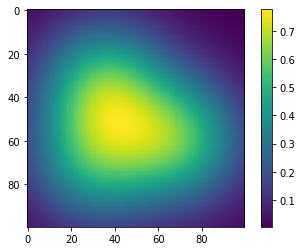

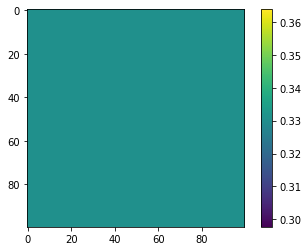

In [71]:
#[  13.15718436   36.19254262   -7.48787188 -101.20914784   
#   13.15718436   36.19254262   -7.48787188   23.11008099  
#   -26.41737105  -72.26331953   15.70839679   78.42984668]
#[-0.3,-0.3,0.3,0])+gaussian2D(grid,[0.4,0.2,0.5,0]
N=100
x = np.linspace(-1,1,N)
y = np.linspace(-1,1,N)
grid = np.meshgrid(x,y)

image = gaussian2Dtest(grid,-0.3,-0.3,0.5,0)+gaussian2Dtest(grid,0.4,0.2,0.5,0)+gaussian2Dtest(grid,-0.4,0.4,0.4,0)
plt.imshow(image)
plt.colorbar()
plt.show()

fit = gaussian2Dtest(grid,13.15718436, 36.19254262, -7.48787188, -101.20914784) + gaussian2Dtest(grid,13.15718436,36.19254262, -7.48787188, 23.11008099) + gaussian2Dtest(grid,-26.41737105,-72.26331953,15.70839679,78.42984668)
plt.imshow(fit)
plt.colorbar()
plt.show()


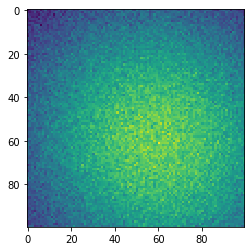

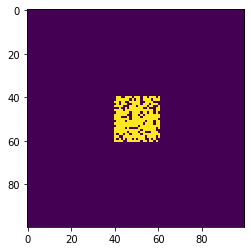

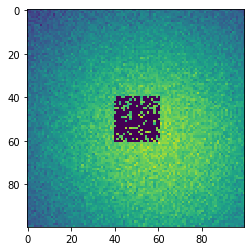

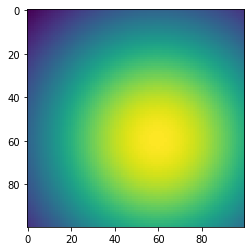

In [29]:
### imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

"""
One gaussian, simple example
"""


def gaussian2D(points,mx,my,ax,ay,N,C):
	"""
	Gaussian function in 2D:
		- points = (x,y) is the grid array at which the function is being evaluated
		- (mx,my) = (mu_x,mu_y) is the centre of the distribution
		- (ax,ay) = (alpha_x,alpha_y) = [1/(2 * sigma_x^2),1/(2 * sigma_y^2)]
		- N is an arbitrary normalization constant
		- C is a baseline constant
	"""
	x,y = points
	z = N * np.exp( - ax*(x-mx)**2 - ay*(y-my)**2 ) + C
	return z

def simulate(N):
	""" Simulate noisy data to fit
	"""
	x = np.linspace(-1,1,N)
	y = np.linspace(-1,1,N)
	grid = np.meshgrid(x,y)
	noise = np.random.normal(0,0.1,size=(N,N))
	image = gaussian2D(grid,0,0,0.5,0.5,1,0) + gaussian2D(grid,0.5,0.5,0.5,0.5,0.7,0)
	return grid,image+noise

def fit(grid,data,sat,peaks=1):
	"""
	Function takes array image and boolean array of same shape,
	which is True where pixels are saturated and False elsewhere.
	Returns the image with saturated pixels corrected.
	"""
	Ndata = np.count_nonzero(sat==False) # number of usable data points
	Nx,Ny = data.shape # number of points in x and y axes
	x = np.arange(0,Nx) # (x indices) = (x position)*scale + translation
	y = np.arange(0,Ny) # (y indices) = (y position)*scale + translation
	X,Y = grid # index grid

	mu_x = np.floor(X[sat].mean())
	mu_y = np.floor(Y[sat].mean())
	sigma_x = X[sat].max() - X[sat].min()
	sigma_y = Y[sat].max() - Y[sat].min()
	N,C = data.max(),data.min()
	guess_params = np.array([mu_x,mu_y,1/sigma_x**2,1/sigma_y**2,N,C])

	fit_x = np.empty([2,Ndata],float)
	fit_data = np.empty(Ndata,float)
	k = 0
	for i in range(Nx):
		for j in range(Ny):
			if sat[i,j]:
				continue
			else:
				fit_x[:,k] = np.array([X[i,j],Y[i,j]])
				fit_data[k] = data[i,j]
			k+=1
            
	[mx,my,ax,ay,N,C],cov = curve_fit(gaussian2D,fit_x,fit_data,guess_params)
	return gaussian2D(grid,mx,my,ax,ay,N,C)

if __name__ == '__main__':

	grid,data = simulate(100)
	sat = np.zeros(data.shape,bool)
	for i in range(40,61):
		for j in range(40,61):
			a = np.random.randint(0,2,size=1)
			if a==0:
				b = np.random.randint(0,2,size=1)
				sat[i,j] = bool(b)
			else:
				sat[i,j] = True

                
#real data
	plt.imshow(data)
	plt.show()
	plt.imshow(sat)
	plt.show()

#saturated points
	data[sat] = 0
	plt.imshow(data)
	plt.show()
	fit_data = fit(grid,data,sat)

#saturated images
	plt.imshow(fit_data)
	plt.show()

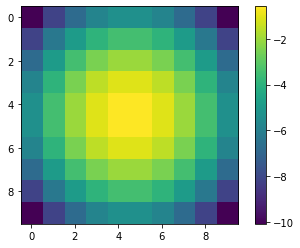

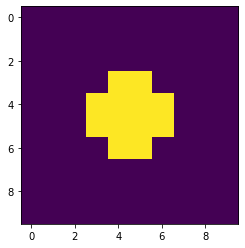

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:96: RuntimeWarning: divide by zero encountered in log10


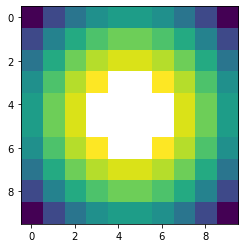

[7.681301526669907e-10, 7.681301526669841e-10, 0.3499999999999388, 2.244708485526018e-15]


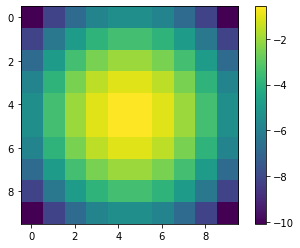

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:104: RuntimeWarning: divide by zero encountered in log10
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:104: RuntimeWarning: invalid value encountered in log10


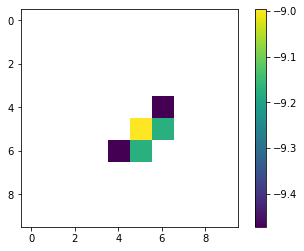

In [18]:
"""
This script simulates the centre of a Hub-Filament System with saturated pixels
Multiple gaussians fit by 1 gaussian
"""

### imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def gaussian2D(points,mx,my,N,C):
	FWHM = 0.5                              #FWHM value ?
	sig = FWHM /(2*np.sqrt(2*np.log(2)))
	a = 1/(2*sig**2)
	"""
	Gaussian function in 2D:
		- points = (x,y) is the grid array at which the function is being evaluated
		- (mx,my) = (mu_x,mu_y) is the centre of the distribution
		- (ax,ay) = (alpha_x,alpha_y) = [1/(2 * sigma_x^2),1/(2 * sigma_y^2)]
		- N is an arbitrary normalization constant
		- C is a baseline constant
	"""
	x,y = points
	z = N * np.exp( - a*(x-mx)**2 - a*(y-my)**2 ) + C
	return z

def f(x,*args):
	return(args[::2])

def gaussian2Dmult(points,*args):
	z = 0
	for i in range(len(args)//4):
		mx,my,N,C = args[4*i:4*(i+1)]
		z += gaussian2D(points,mx,my,N,C)
	return z


def simulate(N):
	""" Simulate noisy data to fit
	"""
	x = np.linspace(-1,1,N)
	y = np.linspace(-1,1,N)
	grid = np.meshgrid(x,y)
	noise = np.random.normal(0,0.0005,size=(N,N))
	image = gaussian2D(grid,0,0,0.35,0)#+gaussian2D(grid,0.8,1,0.5,0)
	return grid,image#+noise

def fit1(grid,data,sat,peaks=1):
	"""
	Function takes array image, its grid and boolean array of same shape,
	which is True where pixels are saturated and False elsewhere.
	Returns the image with saturated pixels corrected.
	"""
	Ndata = np.count_nonzero(sat==False) # number of usable data points
	Nx,Ny = data.shape # number of points in x and y axes
	X,Y = grid # index grid

	mu_x = np.round(X[sat].mean(),3)
	mu_y = np.round(Y[sat].mean(),3)
	N,C = data.max(),data.min()
	guess_params = np.array([mu_x,mu_y,N,C])

	fit_x = np.empty([2,Ndata],float)
	fit_data = np.empty(Ndata,float)
	k = 0
	for i in range(Nx):
		for j in range(Ny):
			if sat[i,j]:
				continue
			else:
				fit_x[:,k] = np.array([X[i,j],Y[i,j]])
				fit_data[k] = data[i,j]
			k += 1

	[mx,my,N,C],cov = curve_fit(gaussian2D,fit_x,fit_data,guess_params)
	print([mx,my,N,C])
	image = np.empty(data.shape)
	image[sat] = gaussian2D((X[sat],Y[sat]),mx,my,N,C)
	image[sat==False] = data[sat==False]
	return image

if __name__ == '__main__':
	Npoints=10
	grid,data = simulate(Npoints)
	sat = np.zeros(data.shape,bool)
	sat[data>np.max(data)*0.2] = True

	plt.imshow(np.log10(data))
	plt.colorbar()
	plt.show()
	plt.imshow(sat)
	plt.show()

	data2 = data.copy()
	data2[sat] = 0
	plt.imshow(np.log10(data2))
	plt.show()
	fit_data = fit1(grid,data2,sat)

	plt.imshow(np.log10(fit_data))
	plt.colorbar()
	plt.show()
    
	plt.imshow(np.log10(fit_data-data))
	plt.colorbar()
	plt.show()    

	#x = np.linspace(-1,1,101)
	#y = x.copy()
	#grid = np.meshgrid(x,y)

	#mux1,muy1,ax1,ay1,N1,C1 = +0.5,-0.3,5,10,1,0 
	#mux2,muy2,ax2,ay2,N2,C2 = +0.3,-0.4,10,10,1,0 
	#mux3,muy3,ax3,ay3,N3,C3 = 0,0.2,10,5,1,0 

	#z = gaussian2Dmult(grid,mux1,muy1,ax1,ay1,N1,C1,mux2,muy2,ax2,ay2,N2,C2,mux3,muy3,ax3,ay3,N3,C3)
	#plt.imshow(z,origin='lower')
	#plt.show()

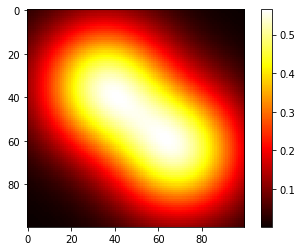

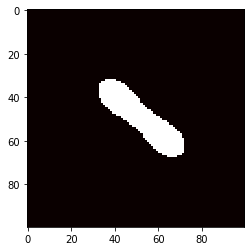

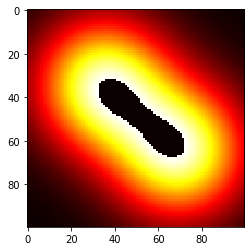

[ 0.05       -0.          0.53745311  0.          0.05       -0.
  0.53745311  0.        ]
[ 0.4         0.3         0.5        -5.16032498 -0.3        -0.3
  0.5         5.16032498]


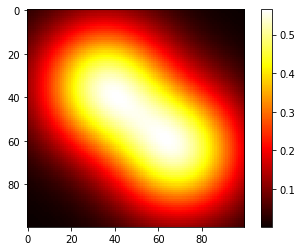

In [23]:
"""
Set number of gaussians on the fit
"""

### imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def gaussian2D(points,mx1,my1,N1,C1,mx2,my2,N2,C2):
	#mx1,my1,N1,C1,mx2,my2,N2,C2 = params
	FWHM = 1                     #FWHM value ?
	sig = FWHM /(2*np.sqrt(2*np.log(2)))
	a = 1/(2*sig**2)
	"""
	Gaussian function in 2D:
		- points = (x,y) is the grid array at which the function is being evaluated
		- (mx,my) = (mu_x,mu_y) is the centre of the distribution
		- (ax,ay) = (alpha_x,alpha_y) = [1/(2 * sigma_x^2),1/(2 * sigma_y^2)]
		- N is an arbitrary normalization constant
		- C is a baseline constant
	"""
	x,y = points
	z=0
	for i in range(2): #testing a loop here
		z += (1-i)*(N1 * np.exp( - a*(x-mx1)**2 - a*(y-my1)**2 ) + C1) + i*(N2 * np.exp( - a*(x-mx2)**2 - a*(y-my2)**2 ) + C2)
	return z


def simulate(N):
	""" Simulate noisy data to fit
	"""
	x = np.linspace(-1,1,N)
	y = np.linspace(-1,1,N)
	grid = np.meshgrid(x,y)
	noise = np.random.normal(0,0.01,size=(N,N))
	image = gaussian2D(grid,-0.3,-0.3,0.5,0, 0.4,0.3,0.5,0)
	return grid,image #+noise

def fit2(grid,data,sat):
	"""
	Function takes array image, its grid and boolean array of same shape,
	which is True where pixels are saturated and False elsewhere.
	Returns the image with saturated pixels corrected.
	"""
	Ndata = np.count_nonzero(sat==False) # number of usable data points
	Nx,Ny = data.shape    # number of points in x and y axes
	X,Y = grid            # index grid

	sources=2                   # contador de fontes
	guess_params = np.zeros(4*sources) # guess params
	for i in range(sources):
		desvio = [[-0.3,-0.4,0,0],[0.3,0.4,0,0]]        
		mu_x = np.round(X[sat].mean(),3)
		mu_y = np.round(Y[sat].mean(),3)
		N,C = data.max(),data.min()
		guess_params[4*i:4*(i+1)] = np.array([mu_x,mu_y,N,C]) #+ desvio[i]
	print(guess_params)

	fit_x = np.empty([2,Ndata],float)
	fit_data = np.empty(Ndata,float)
	k = 0
	for i in range(Nx):
		for j in range(Ny):
			if sat[i,j]:
				continue
			else:
				fit_x[:,k] = np.array([X[i,j],Y[i,j]])
				fit_data[k] = data[i,j]
			k += 1
	params,cov = curve_fit(gaussian2D,fit_x,fit_data,guess_params)   #using cov as error ?
	print(params)
	image = np.empty(data.shape) 
	mx1,my1,N1,C1,mx2,my2,N2,C2 = params
	image[sat==True] = gaussian2D((X[sat],Y[sat]),mx1,my1,N1,C1,mx2,my2,N2,C2)

	#image[sat] = gaussian2Dmult((X[sat],Y[sat]),params)
	image[sat==False] = data[sat==False]
	return image

if __name__ == '__main__':

	grid,data = simulate(100)
	sat = np.zeros(data.shape,bool)
	for i in range(100):
		for j in range(100):
			if data[i,j]>np.max(data)*0.95:
				sat[i,j] = True

	plt.imshow(data)
	plt.colorbar()
	plt.show()
	plt.imshow(sat)
	plt.show()

	data2 = data.copy()
	data2[sat] = 0
	plt.imshow(data2)
	plt.show()
	fit_data = fit2(grid,data2,sat)

	plt.imshow(fit_data)
	plt.colorbar()
	plt.show()

<font color='blue'>
i noticed when stepping back from multi source to 2 source sometimes the fit goes 2* the suposed scale... theres something adding to it because in one example the parameters were correct and produced a perfect fit but the square was 2* the value. 

Another thing is it started working because i put everything into the gaussian2D func instead of passing by the mult func, and because of that got rid of the matrixes (i "unfolded" the values individually)
</font>

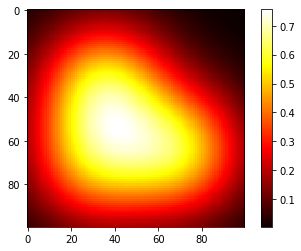

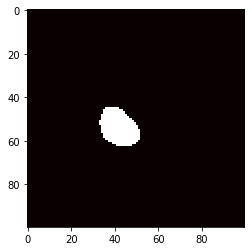

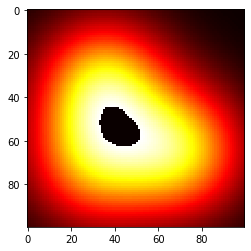

[-0.256       0.089       0.73067634  0.         -0.156       0.189
  0.73067634  0.         -0.256       0.189       0.73067634  0.        ]
[-0.3        -0.3         0.5        -0.35896429  0.4         0.3
  0.5         0.24770864 -0.4         0.4         0.4         0.11125565]


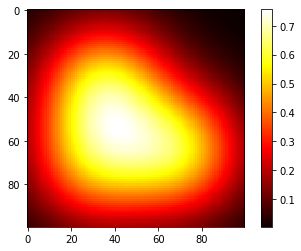

True


In [24]:
"""
Set number of gaussians on the fit, n=3
"""

### imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def gaussian2D(points,mx1,my1,N1,C1,mx2,my2,N2,C2,mx3,my3,N3,C3):
	#mx1,my1,N1,C1,mx2,my2,N2,C2 = params
	FWHM = 1                     #FWHM value ?
	sig = FWHM /(2*np.sqrt(2*np.log(2)))
	a = 1/(2*sig**2)
	"""
	Gaussian function in 2D:
		- points = (x,y) is the grid array at which the function is being evaluated
		- (mx,my) = (mu_x,mu_y) is the centre of the distribution
		- (ax,ay) = (alpha_x,alpha_y) = [1/(2 * sigma_x^2),1/(2 * sigma_y^2)]
		- N is an arbitrary normalization constant
		- C is a baseline constant
	"""
	x,y = points
	z = (N1 * np.exp( - a*(x-mx1)**2 - a*(y-my1)**2 ) + C1) + (N2 * np.exp( - a*(x-mx2)**2 - a*(y-my2)**2 ) + C2) + (N3 * np.exp( - a*(x-mx3)**2 - a*(y-my3)**2 ) + C3)
	return z


def simulate(N):
	""" Simulate noisy data to fit
	"""
	x = np.linspace(-1,1,N)
	y = np.linspace(-1,1,N)
	grid = np.meshgrid(x,y)
	noise = np.random.normal(0,0.01,size=(N,N))
	image = gaussian2D(grid,-0.3,-0.3,0.5,0,   0.4,0.3,0.5,0,   -0.4,0.4,0.4,0)
	return grid,image #+noise

def fit3(grid,data,sat):
	"""
	Function takes array image, its grid and boolean array of same shape,
	which is True where pixels are saturated and False elsewhere.
	Returns the image with saturated pixels corrected.
	"""
	Ndata = np.count_nonzero(sat==False) # number of usable data points
	Nx,Ny = data.shape    # number of points in x and y axes
	X,Y = grid            # index grid

	sources=3                   # contador de fontes
    
	guess_params = np.zeros(4*sources) # guess params
	for i in range(sources):
		desvio = [[-0.1,0,0,0],[0,0.1,0,0],[-0.1,0.1,0,0]]           
		mu_x = np.round(X[sat].mean(),3)
		mu_y = np.round(Y[sat].mean(),3)
		N,C = data.max(),data.min()
		guess_params[4*i:4*(i+1)] = np.array([mu_x,mu_y,N,C]) + desvio[i]
	print(guess_params)

	fit_x = np.empty([2,Ndata],float)
	fit_data = np.empty(Ndata,float)
	k = 0
	for i in range(Nx):
		for j in range(Ny):
			if sat[i,j]:
				continue
			else:
				fit_x[:,k] = np.array([X[i,j],Y[i,j]])
				fit_data[k] = data[i,j]
			k += 1
	params,cov = curve_fit(gaussian2D,fit_x,fit_data,guess_params)   #using cov as error ?
	print(params)
	image = np.empty(data.shape) 
	mx1,my1,N1,C1,mx2,my2,N2,C2,mx3,my3,N3,C3 = params
	image[sat==True] = gaussian2D((X[sat],Y[sat]),mx1,my1,N1,C1,mx2,my2,N2,C2,mx3,my3,N3,C3)

	#image[sat] = gaussian2Dmult((X[sat],Y[sat]),params)
	image[sat==False] = data[sat==False]
	return image

def errorCheck(grid): #continuity check for error
	N=len(grid)
	interval = (grid.max()-grid.min())/len(grid) * 10 #fator para definir error margin
	#print(interval)
	for i in range(N):
		#print(i,np.max(abs(grid[i,:-1]-grid[i,1:])))
		if np.max(abs(grid[i,:-1]-grid[i,1:])) > interval:
			return False      #BAD
        
	return True               #all good
    

if __name__ == '__main__':

	grid,data = simulate(100)
	sat = np.zeros(data.shape,bool)
	for i in range(100):
		for j in range(100):
			if data[i,j]>np.max(data)*0.965:
				sat[i,j] = True

	plt.imshow(data)
	plt.colorbar()
	plt.show()
	plt.imshow(sat)
	plt.show()

	data2 = data.copy()
	data2[sat] = 0
	plt.imshow(data2)
	plt.show()
	fit_data = fit3(grid,data2,sat)

	plt.imshow(fit_data)
	plt.colorbar()
	plt.show()
    
	print(errorCheck(fit_data))

<font color='blue'>
It works for a low saturation ($>$96.5% com desvio) however doesnt converge correctly for higher saturation. So it is somewhat dependent on a good desvio to converge correctly.
    
IDEA: use continuity as a measure of error, run several sets of points and register in a list the points to which the function correctly converges.
DOWNSIDE: run for different numbers of sources manueally untill satisfied.



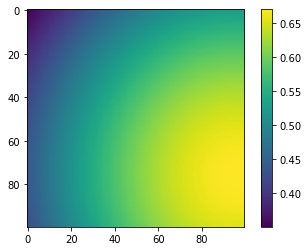

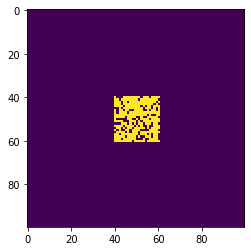

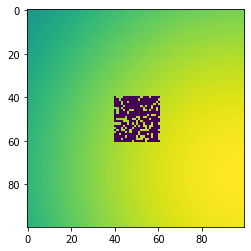

1
[0.97699298 0.49236672 0.64882674 0.02220544] 2.493421642538523e-07
2
[ -401.39492227   283.16292279   -72.79616166   257.24213923
  1864.955012   -1541.83033514   -27.36980968  -256.68851372] inf
3
[   -2.92973542    25.88271138   -84.77180616   -22.66497295
    -3.00327818   -21.55609735    79.27849922   855.58814997
 -2581.90818545   818.71627799     7.31129103  -832.36955267] inf
4
[-3.20025818e+02 -1.77662575e+02 -3.47563569e+01 -1.91515409e+02
  4.37941930e+01 -2.17492947e+01 -5.60999839e+01  2.02098421e+02
  2.21118825e+02 -3.09805616e-01  1.09192255e+02 -5.27853303e+00
  5.32146416e+01  2.08290074e+02 -1.76830596e+01 -4.75085630e+00] inf


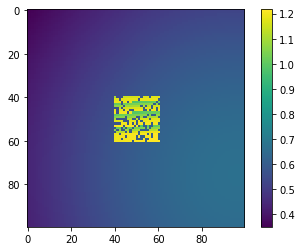

In [92]:
"""
MULTIGAUSSIAN ATTEMPT

#margin for error 1e-6
"""

### imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def gaussian2D(points,params):
	mx,my,N,C = params
	FWHM = 5                              #FWHM value ?
	sig = FWHM /(2*np.sqrt(2*np.log(2)))
	a = 1/(2*sig**2)
	"""
	Gaussian function in 2D:
		- points = (x,y) is the grid array at which the function is being evaluated
		- (mx,my) = (mu_x,mu_y) is the centre of the distribution
		- (ax,ay) = (alpha_x,alpha_y) = [1/(2 * sigma_x^2),1/(2 * sigma_y^2)]
		- N is an arbitrary normalization constant
		- C is a baseline constant
	"""
	x,y = points
	z = N * np.exp( - a*(x-mx)**2 - a*(y-my)**2 ) + C
	return z

def f(x,*args):
	return(args[::2])

def gaussian2Dmult(points,*args):
	z = 0
	#print(*args)
	for i in range(len(args)//4):
		mx,my,N,C = args[4*i:4*(i+1)]
		z += gaussian2D(points,[mx,my,N,C])
	return z


def simulate(N):
	""" Simulate noisy data to fit
	"""
	x = np.linspace(-1,1,N)
	y = np.linspace(-1,1,N)
	grid = np.meshgrid(x,y)
	noise = np.random.normal(0,0.0005,size=(N,N))
	image = gaussian2D(grid,[0.8,-0.5,0.2,0])+gaussian2D(grid,[1,0.9,0.5,0])
	return grid,image#+noise

def fit(grid,data,sat,peaks=1):
	"""
	Function takes array image, its grid and boolean array of same shape,
	which is True where pixels are saturated and False elsewhere.
	Returns the image with saturated pixels corrected.
	"""
	Ndata = np.count_nonzero(sat==False) # number of usable data points
	Nx,Ny = data.shape    # number of points in x and y axes
	X,Y = grid            # index grid

    
	margin=1e-7
	error=margin+1               # jumpstart
	sources=0             # contador de fontes
	while (error > margin) and sources < 4: # keep adding gaussians, the <4 limits for now
		sources+=1
		guess_params = np.empty(4*sources) # guess params expansion
		for i in range(sources):
			desvio = [[0,0,0,0],[-0.05,0,0,0],[0,-0.05,0,0],[0.05,0,0,0],[0,0.05,0,0]]           
			mu_x = np.floor(X[sat].mean())
			mu_y = np.floor(Y[sat].mean())
			N,C = data.max(),data.min()
			guess_params[4*i:4*(i+1)] = np.array([mu_x,mu_y,N,C]) + desvio[i]

		fit_x = np.empty([2,Ndata],float)
		fit_data = np.empty(Ndata,float)
		k = 0
		for i in range(Nx):
			for j in range(Ny):
				if sat[i,j]:
					continue
				else:
					fit_x[:,k] = np.array([X[i,j],Y[i,j]])
					fit_data[k] = data[i,j]
				k += 1
		print(sources)
		params,cov = curve_fit(gaussian2Dmult,fit_x,fit_data,guess_params)   #using cov as error ?
		error = np.max(cov)
		print(params,error)

	image = np.empty(data.shape) 
	for i in range(sources):
		image[sat] += gaussian2D((X[sat],Y[sat]),params[4*(i):4*(i+1)])

	#image[sat] = gaussian2Dmult((X[sat],Y[sat]),params)
	image[sat==False] = data[sat==False]
	return image

if __name__ == '__main__':

	grid,data = simulate(100)
	sat = np.zeros(data.shape,bool)
	for i in range(40,61):
		for j in range(40,61):
			a = np.random.randint(0,2,size=1)
			if a==0:
				b = np.random.randint(0,2,size=1)
				sat[i,j] = bool(b)
			else:
				sat[i,j] = True

	plt.imshow(data)
	plt.colorbar()
	plt.show()
	plt.imshow(sat)
	plt.show()

	data2 = data.copy()
	data2[sat] = 0
	plt.imshow(data2)
	plt.show()
	fit_data = fit(grid,data2,sat)

	plt.imshow(fit_data)
	plt.colorbar()
	plt.show()

	#x = np.linspace(-1,1,101)
	#y = x.copy()
	#grid = np.meshgrid(x,y)

	#mux1,muy1,ax1,ay1,N1,C1 = +0.5,-0.3,5,10,1,0 
	#mux2,muy2,ax2,ay2,N2,C2 = +0.3,-0.4,10,10,1,0 
	#mux3,muy3,ax3,ay3,N3,C3 = 0,0.2,10,5,1,0 

	#z = gaussian2Dmult(grid,mux1,muy1,ax1,ay1,N1,C1,mux2,muy2,ax2,ay2,N2,C2,mux3,muy3,ax3,ay3,N3,C3)
	#plt.imshow(z,origin='lower')
	#plt.show()

In [19]:
import numpy as np
a=np.array([1,2,3,4])
b=np.array([3,4])
print(a[:-1])

[1 2 3]


# Read file

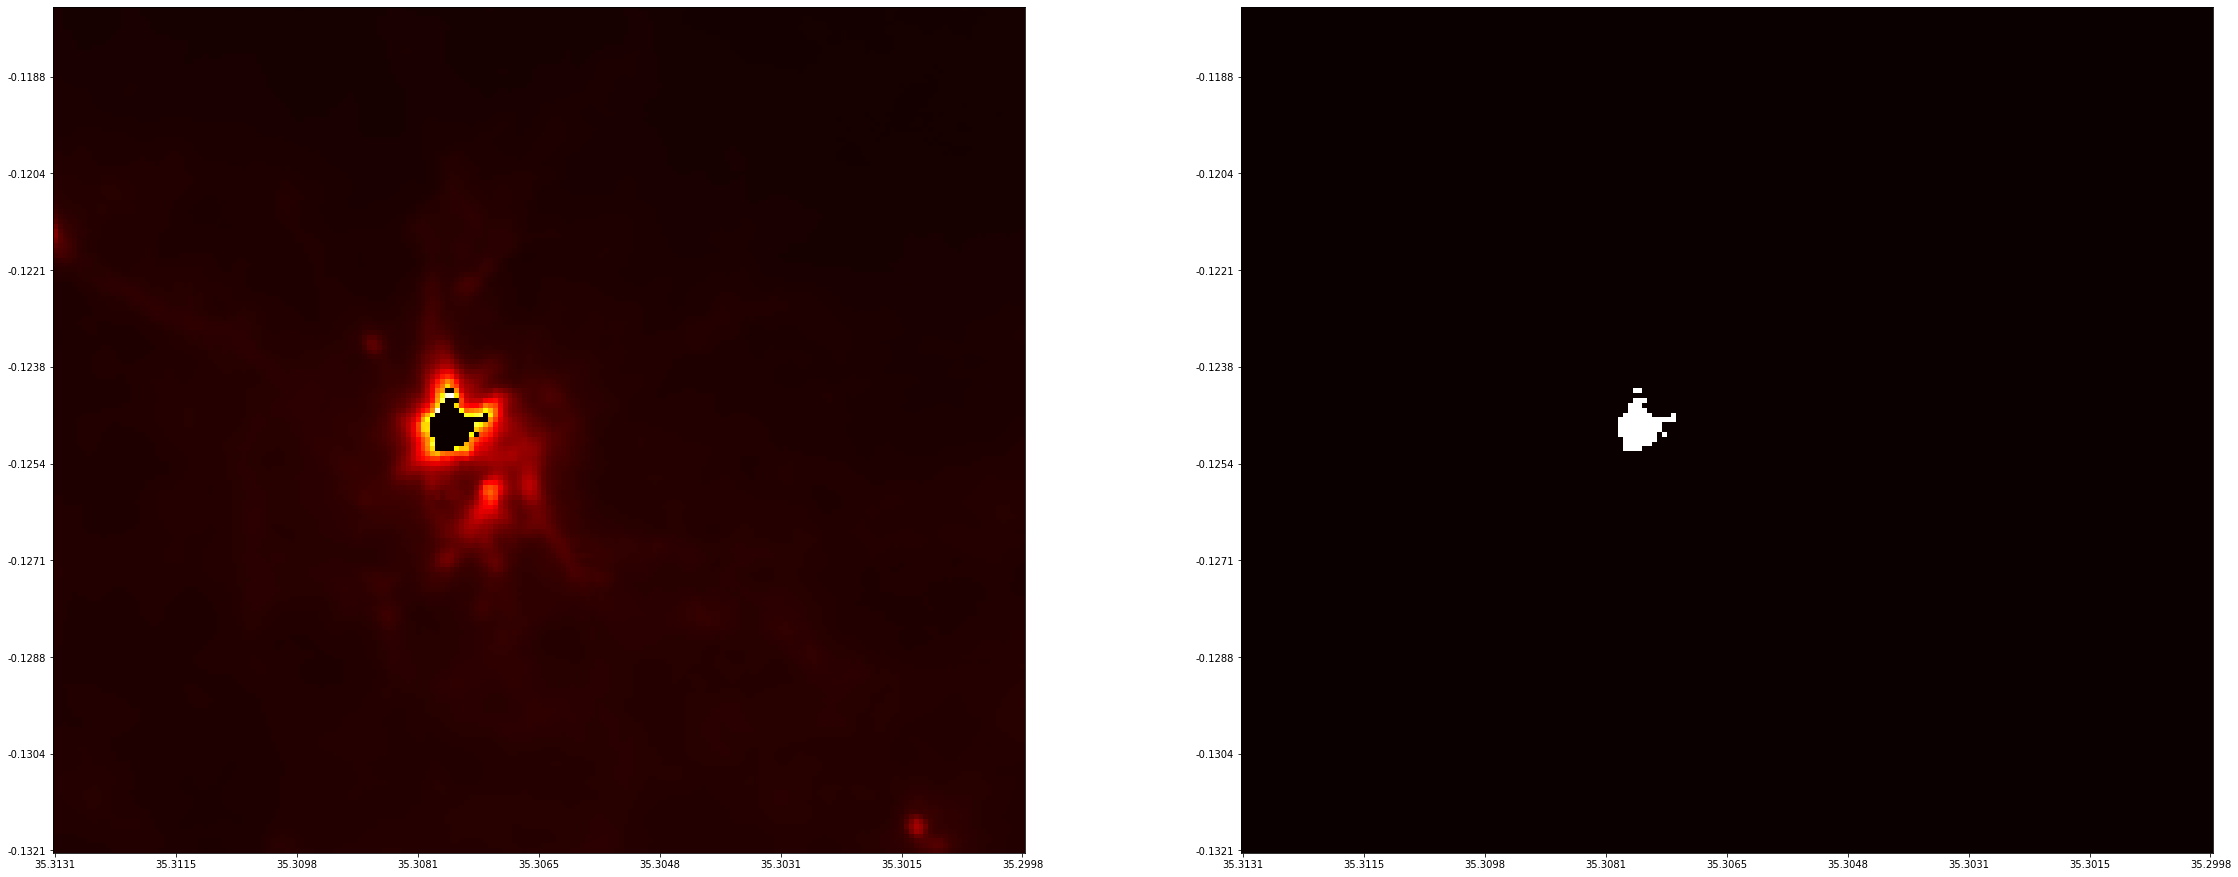

In [28]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# open fits file
hdu = fits.open('satexample1.fits')[0]
header = hdu.header
data = hdu.data
newdata = data[75:125,75:125]
sat_area = np.zeros(data.shape,bool)
sat_area[data==data.min()] = True

# axis values from header
x0,y0 = header['crval1'],header['crval2']
dx,dy = header['cdelt1'],header['cdelt2']
nx,ny = header['naxis1'],header['naxis2']
x = x0 + dx*np.arange(0,nx)
y = y0 + dy*np.arange(0,ny)
grid = np.meshgrid(x,y)

# plot and show image
fig = plt.figure(figsize=(30,15*ny/nx))
ax1 = plt.axes([0,0,0.45,1])
ax2 = plt.axes([0.55,0,0.45,1])
ax1.imshow(data,origin='lower',cmap='hot')
ax2.imshow(sat_area,origin='lower')
ax1.set_xticklabels(np.around(x,4))
ax1.set_yticklabels(np.around(y,4))
ax2.set_xticklabels(np.around(x,4))
ax2.set_yticklabels(np.around(y,4))
plt.show()

In [29]:
fixed = fit3(grid,newdata,sat_area)

plt.imshow(fixed,origin="lower")
plt.hot()
plt.colorbar()

[3.50780000e+01 1.30000000e-02 5.75579102e+04 0.00000000e+00
 3.51780000e+01 1.13000000e-01 5.75579102e+04 0.00000000e+00
 3.50780000e+01 1.13000000e-01 5.75579102e+04 0.00000000e+00]


ValueError: array must not contain infs or NaNs